In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
df = pd.read_csv('top-5000-youtube-channels.csv')

In [30]:
df.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [31]:
df.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [32]:
print(f"Rows = {df.shape[0]} and Columns = {df.shape[1]}")

Rows = 5000 and Columns = 6


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [34]:
df.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


In [35]:
df[df["Video Uploads"]=="--"]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
267,268th,,MidnightXChannel,--,--,190256974
517,518th,,Dusama Pets TV,--,--,91601494
2323,"2,324th",,Random,--,12275,17897584
3072,"3,073rd",,Boram Tube Toy Shcool [보람튜브…,--,726527,205555289
3247,"3,248th",,atheer sultan,--,--,79663674
4898,"4,899th",,ExzoticSlice,--,99785,9745292


In [36]:
df["Video Uploads"] = df["Video Uploads"].replace("--",np.nan)

In [37]:
df["Subscribers"] = df["Subscribers"].replace("--",np.nan, regex=True)

In [38]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [39]:
df.dropna(axis=0, inplace=True)

In [40]:
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [41]:
df["Video Uploads"] = df["Video Uploads"].astype("int64")

In [42]:
df["Subscribers"] = df["Subscribers"].astype("int64")

In [43]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

In [44]:
round(df["Video views"].mean())

1138403081

In [55]:
df[["Channel name", "Video Uploads"]].sort_values("Video Uploads", ascending=False)


,Channel name,Video Uploads
3453,AP Archive,422326
1149,YTN NEWS,355996
2223,SBS Drama,335521
323,GMA News,269065
2956,MLB,267649
...,...,...
4100,DenzelCurryVEVO,1
2404,ItsHARSH007 Gaming,1
4474,hyghhopes,1
628,cocoz toon,1


In [56]:
df.corr()

C:\Users\Rohail Mansab\AppData\Local\Temp\ipykernel_1848\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Video Uploads,Subscribers,Video views
Video Uploads,1.000000,0.011362,0.087830
Subscribers,0.011362,1.000000,0.791241
Video views,0.087830,0.791241,1.000000


C:\Users\Rohail Mansab\AppData\Local\Temp\ipykernel_1848\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


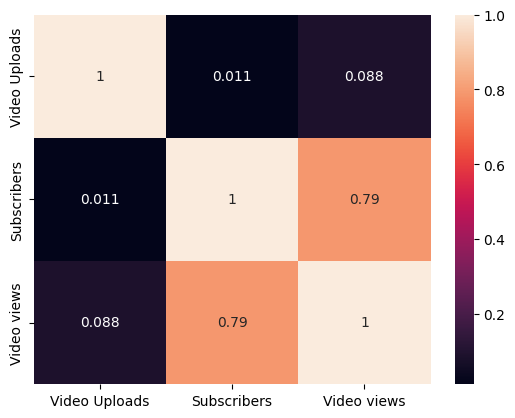

In [58]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
df.groupby("Grade")["Video Uploads"].sum().sort_values(ascending=False).head(1)

Grade
B+     8536620
Name: Video Uploads, dtype: int64

In [62]:
df.groupby("Grade")["Video views"].mean().sort_values(ascending=False)

Grade
A++     2.119909e+10
A+      6.168742e+09
A       2.497973e+09
A-      1.102450e+09
B+      5.551838e+08
Name: Video views, dtype: float64

In [63]:
df.groupby("Grade")["Subscribers"].mean().sort_values(ascending=False)

Grade
A++     2.228176e+07
A+      1.172695e+07
A       5.107136e+06
A-      2.798520e+06
B+      1.535208e+06
Name: Subscribers, dtype: float64

In [64]:
df.groupby("Grade")["Video views"].mean().sort_values(ascending=False)

Grade
A++     2.119909e+10
A+      6.168742e+09
A       2.497973e+09
A-      1.102450e+09
B+      5.551838e+08
Name: Video views, dtype: float64